---
## Comprehensive Analysis of Pediatric Emergency Care Efficiency in Queensland Hospitals

**Scenario:**  When children are unwell it is a stressful period not only for the child, but their carers (e.g. parent/s), and other family members and friends as well. Child injury and illness, and the extent to which they can be alleviated is a significant concern for local communities. Serious injury or illness will usually result in a child presenting to an emergency department (ED) of a local hospital. The degree of stress for children and their support network can be impacted significantly by lengthy wait times in the ED. Thus there is a general community interest knowing how well local hospitals are performing in this area.

 **Data Source:** Queensland Health provides open data on [paediatric emergency departments via data.gov.au](https://data.gov.au/dataset/ds-qld-c9c345bd-f05a-47ca-84b6-aade1e062d8b/details?q=emergency) NOTE: Use *Summary 1* and *Summary 3* data from 2022 for this task.

**Task:** Your task as a data analyst is to:

- Identify high quality questions that when answered may be helpful in addressing the scenario above
- Select at least _3 months_ of ED paediatric data to analyse
- Select at least _2 hospitals_ with high quality data to analyse
- Clean the data as necessary
- Analyse the data in a way that answers your questions and ultimately addresses the concern in the scenario
- Visualise your results in a meaningful way that is helpful in making visible key findings
- Provide a detailed summary of the insights found and how they address the original questions and scenario

NOTE: You must document your thinking and approach throughout the notebook using the Markdown cells

**Planing**

- The degree of stress for children and their support network can be impacted significantly by lengthy wait times in the ED. Thus there is a general community interest knowing how well local hospitals are performing in this area.
- ---> First question is how to assess the performance of local hospitals in this area.
- -----> Obtaining data from PD
- --------> How to assess the performance of hospital?
- ----------> The compliance of standard waiting period against triage. Triage level meaning the severity of children's injury. Level 1 for the highest priority and Level 5 for the lowest.
- As a parent of twin children, my very concern is my children did not receive treatment on time when they were sent to ED. 
    - First, I am going to find out any hospitals in Queensland did not meet the requirement of triage standard.
    - Then, I am going to see the percentage of treatment were received within clinically recommended time.


In [11]:
#Loading data
import pandas as pd
Jun_1_data = pd.read_excel('https://www.data.qld.gov.au/dataset/c9c345bd-f05a-47ca-84b6-aade1e062d8b/resource/7b8e4e90-a5f7-4484-a4d9-45d05203bae5/download/jun22edpaediatrics1.xls', header= None)
Jun_3_data = pd.read_excel('https://www.data.qld.gov.au/dataset/c9c345bd-f05a-47ca-84b6-aade1e062d8b/resource/77cb06d1-1584-45e1-9cc4-0b3867e6b31b/download/jun22edpaediatrics3.xls', header= None)
Sep_1_data = pd.read_csv('https://www.data.qld.gov.au/dataset/c9c345bd-f05a-47ca-84b6-aade1e062d8b/resource/b66fe34b-c9f6-4c62-871b-e27c8d06793d/download/ed_paeds_quarterly1sep22.csv', header = None)
Sep_3_data = pd.read_csv('https://www.data.qld.gov.au/dataset/c9c345bd-f05a-47ca-84b6-aade1e062d8b/resource/7763a1f8-f1a4-4bec-a873-eb71df4eb4f7/download/ed_paeds_quarterly3sep22.csv', header = None)
Dec_1_data = pd.read_excel('https://www.data.qld.gov.au/dataset/c9c345bd-f05a-47ca-84b6-aade1e062d8b/resource/67f70e4d-9f39-4d2f-b999-234090a1ca29/download/dec22edpaediatrics1.xlsx', header = None)
Dec_3_data = pd.read_csv('https://www.data.qld.gov.au/dataset/c9c345bd-f05a-47ca-84b6-aade1e062d8b/resource/bb9f2d6e-33b1-468b-bd5b-b9cc494291b2/download/ed_paeds_quarterly3dec22.csv', header = None)
Dic_1 = pd.read_excel('https://www.data.qld.gov.au/dataset/c9c345bd-f05a-47ca-84b6-aade1e062d8b/resource/829ea502-569d-49e7-9cdc-d1843fdda3c4/download/ed_paeds1_file_desc.xls',header = None)
Dic_3 = pd.read_excel('https://www.data.qld.gov.au/dataset/c9c345bd-f05a-47ca-84b6-aade1e062d8b/resource/a5c0f4f3-6e54-4ec9-8cfc-8f6a52c07b16/download/ed_paeds3_file_desc.xls',header = None)

## Analyse note
---
**Scenario:**  When children are unwell it is a stressful period not only for the child, but their carers (e.g. parent/s), and other family members and friends as well. Child injury and illness, and the extent to which they can be alleviated is a significant concern for local communities. Serious injury or illness will usually result in a child presenting to an emergency department (ED) of a local hospital. The degree of stress for children and their support network can be impacted significantly by lengthy wait times in the ED. Thus there is a general community interest knowing how well local hospitals are performing in this area.
**Task:** Your task as a data analyst is to:

- Identify high quality questions that when answered may be helpful in addressing the scenario above
- Select at least _3 months_ of ED paediatric data to analyse
- Select at least _2 hospitals_ with high quality data to analyse
- Clean the data as necessary
- Analyse the data in a way that answers your questions and ultimately addresses the concern in the scenario
- Visualise your results in a meaningful way that is helpful in making visible key findings
- Provide a detailed summary of the insights found and how they address the original questions and scenario

**Stackholder**

As a parent who has twin daughters, I am concerned about the hospital's capability to treat my daughters on time if anything happened in Queensland.
In addition, I want to know if any of hospital in Queensland failed to see or treat my daughters on time, which I should avoid attending those hospitals when anything happens.
Then, that leads to my concern about how many hospital treat their patients on time, is it over half of them?

**QDAVI Cycle**

QDAVI Cyle is listed below to help guiding the whole analysis and decision makeing process.

- Question
- Data
- Analysis
- Visualisation
- Insight

**Questions should be asked to extract information**
- The ultimate question is that local hospitals' paediatric ED performance.
    - Queensland hospitals treating kids within standard timeframe. Which hospitals are not treating kids within standard timeframe?
- What information we need to assess the performance of local hosipitals?
    - Find 2 hospitals' data with high quality.
        - Length of waiting period (Summary 1)
        - Check whether it comply with the standard.
        - Check whether there is any hospital treat less than half (50%) of their patient within clinically recommended time. If they fail to treat half their patient which may meaning that their capacity of treating patient on time are limited.
- What question should I ask? What information should I need to judge whether the hospital is capable to treat children on time?
    - Check with median waiting period in summary 1. Median waiting period may not be capable to represent the waiting time everytime parents who bring their children to ED, however, this could be an indication that how long will parents or caregivers wait before they are admitted or seen by medical practitioners. 
        - Is there any standard of waiting period?
        - Is there any hospital failed to comply the standard if there is standard of waiting period?
        - How many of them across Queensland?
        - If there are hospitals failed to comply the standard, are they improving?
            - From Queensland Health point of view, the number of hospitals failed to comply is diminishing over time meaning improvement.
    - Check with the percentage of treatment within clinically recommended time in summary 3. Low percentage of treatment within clinically recommend time may meaning incapable to treat my children if anything severe happened. I would like to avoid those hospitals if anything happened. 
        - Trying to find any of hospital fail to treat half of their patients and in the severe condition (triage 1 & 2)
    

**Data**

    The questions are set to be answered. Datasets we have now has no header in each column. After checking the library, information regarding headers for columns are extracted to analyse and plan to see if any information is useful for further analysis. 

**Analyse headers of columns in Summary 1 and see any useful information to assess the paediatric ED performance of hospital**

---

**Basic information**

- 0  the code of the facility 
- 1  the name of the facility
- 2  the month to which the data refers
- 3  the triage category of the patient,  note: ‘all’ is total value
- 4  number of emergency department attendances

---

- 5  median waiting time for treatment (in minutes)
    - main impact factor addressed in the statement, but how long is too long?
---

- 6  a code denoting the colour of the traffic lighting for the Hospital Performance website – 1 is green, 2 is amber, 3 is red, null is white
- 7  an empty column, no longer used


**Analyse the columns in Summary 3 and see any useful information to assess the paediatric ED performance of hospital**

---

**Basic information**

- 0  the code of the facility 
- 1  the name of the facility
- 2  the month to which the data refers
- 3  the triage category of the patient,  note: ‘all’ is total value
- 4  number of emergency department attendances
    - This could show us the total number of emergency cases.

---

- 5  number of attendances where the patient was seen within clinically recommended time
- 6  percent of attendances where the patient was seen within clinically recommended time
    - This could help us understand the hospital's ability to treat emergency patient properly.
---

- 7  number of attendances where the patient did not wait for treatment
- 8  percent of attendances where the patient did not wait for treatment
    - Didn't treated and left without waiting.
---
- 9  number of attendances where the patient was admitted to an inpatient bed
- 10 percent of attendances where the patient was admitted to an inpatient bed
    - I don't see this number can help to assess the ability of hospital treating patient.
---
- 11 an empty column, no longer used
---
- 12 number of attendances where the patient was admitted to an inpatient bed within four hours
- 13 percent of attendances where the patient was admitted to an inpatient bed within four hours
    - This could only shows that the inpatient process of hospital is quick.

**Analysis**

    The analysis is the journey of exploring the answer of our set questions. Since headers of columns were not set in each dataset, we start naming each column with proper name according to the information obtained from library.

In [12]:
#Select June, September and December of data to analyse
#Start with September
#Check the dataset information in September 1 and 3
    # data 1 is for the brief summaries
    # data 3 is for the more detail summaries
#Name the column
Jun_1_data.columns = ['Code','Name','Month','Triage','ED_attend','Median_wait','performance_code','Empty']
Sep_1_data.columns = ['Code','Name','Month','Triage','ED_attend','Median_wait','performance_code','Empty']
Dec_1_data.columns = ['Code','Name','Month','Triage','ED_attend','Median_wait','performance_code','Empty']
#Name the columns
Jun_3_data.columns = ['Code','Name','Month','Triage','Number_ED','Number_clinical','Percent_clinical','Number_no_wait', 'Percent_no_wait', 'Number_inpatient', 'Percent_inpatient','Empty', 'Number_inp_4hours', 'Percent_inp_4hours']
Sep_3_data.columns = ['Code','Name','Month','Triage','Number_ED','Number_clinical','Percent_clinical','Number_no_wait', 'Percent_no_wait', 'Number_inpatient', 'Percent_inpatient','Empty', 'Number_inp_4hours', 'Percent_inp_4hours']
Dec_3_data.columns = ['Code','Name','Month','Triage','Number_ED','Number_clinical','Percent_clinical','Number_no_wait', 'Percent_no_wait', 'Number_inpatient', 'Percent_inpatient','Empty', 'Number_inp_4hours', 'Percent_inp_4hours']


In [13]:
#Check the data information
Jun_1_data.info()
Sep_1_data.info()
Dec_1_data.info()
#Several missing data were found in the median waiting time in each of dataset
#Check the dataset for first 10 rows
Jun_1_data.head(10)
#The dataset is recorded 6 rows in a group of hospital. I am planning to find the standard of triage waiting time.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              624 non-null    int64  
 1   Name              624 non-null    object 
 2   Month             624 non-null    object 
 3   Triage            624 non-null    object 
 4   ED_attend         624 non-null    int64  
 5   Median_wait       571 non-null    float64
 6   performance_code  624 non-null    object 
 7   Empty             624 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 39.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              630 non-null    int64  
 1   Name              630 non-null    object 
 2   Month             630 non-null    object 
 3   Triage            6

,Code,Name,Month,Triage,ED_attend,Median_wait,performance_code,Empty
0,4,The Prince Charles Hospital,JUN 2022,1,24,0.0,1,-
1,4,The Prince Charles Hospital,JUN 2022,2,1342,6.0,1,-
2,4,The Prince Charles Hospital,JUN 2022,3,2536,42.0,3,-
3,4,The Prince Charles Hospital,JUN 2022,4,5532,55.0,3,-
4,4,The Prince Charles Hospital,JUN 2022,5,537,46.5,3,-
5,4,The Prince Charles Hospital,JUN 2022,ALL,9971,39.0,3,-
6,11,Princess Alexandra Hospital,JUN 2022,1,1,1.0,-,-
7,11,Princess Alexandra Hospital,JUN 2022,2,10,8.0,1,-
8,11,Princess Alexandra Hospital,JUN 2022,3,28,10.0,1,-
9,11,Princess Alexandra Hospital,JUN 2022,4,16,14.5,1,-


In [14]:
#Clean the dataset by removing those hospitals with NaN waiting period
#Considering if drop only rows with NaN values may affect the rest of analysis. We remove the whole set of hospitals with NaN waiting period.
Jun_1_data = Jun_1_data.groupby('Name').filter(lambda x: x['Median_wait'].notnull().all())
Jun_1_data = Jun_1_data.reset_index(drop=True)
Sep_1_data = Sep_1_data.groupby('Name').filter(lambda x: x['Median_wait'].notnull().all())
Sep_1_data = Sep_1_data.reset_index(drop=True)
Dec_1_data = Dec_1_data.groupby('Name').filter(lambda x: x['Median_wait'].notnull().all())
Dec_1_data = Dec_1_data.reset_index(drop=True)
#Problem occured in the following steps, so I reset the index. Don't forget to reset the index after dropping NaN.

In [15]:
#Start with data in June
#Explore the dataset, and find the busiest dataset
#Find the busiest hospital and not so busy hospital in June
Jun_1_data.shape[0]
new_Jun = Jun_1_data.iloc[:-6,:]
Jun_result_max = Jun_1_data.loc[Jun_1_data['ED_attend'] == new_Jun['ED_attend'].max()]
Jun_result_min = Jun_1_data.loc[Jun_1_data['ED_attend'] == new_Jun['ED_attend'].min()]
Jun_facility_name_busy = Jun_result_max['Name'].iloc[0]
Jun_facility_name_nobusy = Jun_result_min['Name'].iloc[0]
print(f'Busy in June is {Jun_facility_name_busy}.')
print(f'Least busy in June is {Jun_facility_name_nobusy}')
#Find the busiest hospital and not so busy hospital in September
Sep_1_data.shape[0]
new_Sep = Sep_1_data.iloc[:-6,:]
Sep_result_max = Sep_1_data.loc[Sep_1_data['ED_attend'] == new_Sep['ED_attend'].max()]
Sep_result_min = Sep_1_data.loc[Sep_1_data['ED_attend'] == new_Sep['ED_attend'].min()]
Sep_facility_name_busy = Sep_result_max['Name'].iloc[0]
Sep_facility_name_nobusy = Sep_result_min['Name'].iloc[0]
print(f'Busy in September is {Sep_facility_name_busy}')
print(f'Least busy in September is {Sep_facility_name_nobusy}')
#Find the busiest hospital and not so busy hospital in December
Dec_1_data.shape[0]
new_Dec = Dec_1_data.iloc[:-6,:]
Dec_result_max = Dec_1_data.loc[Dec_1_data['ED_attend'] == new_Dec['ED_attend'].max()]
Dec_result_min = Dec_1_data.loc[Dec_1_data['ED_attend'] == new_Dec['ED_attend'].min()]
Dec_facility_name_busy = Dec_result_max['Name'].iloc[0]
Dec_facility_name_nobusy = Dec_result_min['Name'].iloc[0]
print(f'Busy in December is {Dec_facility_name_busy}')
print(f'Least busy in December is {Dec_facility_name_nobusy}')

Busy in June is Queensland Children's Hospital.
Least busy in June is Princess Alexandra Hospital
Busy in September is Queensland Children's Hospital
Least busy in September is Esk Hospital
Busy in December is Queensland Children's Hospital
Least busy in December is Esk Hospital


In [16]:
#Check the data of busiest hospital and least busy hospital in June
Max_Jun_row = Jun_1_data.loc[Jun_1_data['Name'] == "Queensland Children's Hospital"].index[0]
Min_Jun_row = Jun_1_data.loc[Jun_1_data['Name'] == "Princess Alexandra Hospital"].index[0]
print(Jun_1_data.iloc[Max_Jun_row:Max_Jun_row+6])
print(Jun_1_data.iloc[Min_Jun_row:Min_Jun_row+6])

     Code                            Name     Month Triage  ED_attend  \
258   202  Queensland Children's Hospital  JUN 2022      1         86   
259   202  Queensland Children's Hospital  JUN 2022      2       2723   
260   202  Queensland Children's Hospital  JUN 2022      3       7409   
261   202  Queensland Children's Hospital  JUN 2022      4       9365   
262   202  Queensland Children's Hospital  JUN 2022      5       1411   
263   202  Queensland Children's Hospital  JUN 2022    ALL      20994   

     Median_wait performance_code Empty  
258          1.0                1     -  
259          7.0                1     -  
260         18.0                1     -  
261         24.0                2     -  
262         29.0                2     -  
263         16.0                1     -  
    Code                         Name     Month Triage  ED_attend  \
6     11  Princess Alexandra Hospital  JUN 2022      1          1   
7     11  Princess Alexandra Hospital  JUN 2022      2  

In [17]:
#Check the data of busiest hospital and least busy hospital in September
Max_Sep_row = Sep_1_data.loc[Sep_1_data['Name'] == "Queensland Children's Hospital"].index[0]
Min_Sep_row = Sep_1_data.loc[Sep_1_data['Name'] == "Esk Hospital"].index[0]
print(Sep_1_data.iloc[Max_Sep_row:Max_Sep_row+6]) 
print(Sep_1_data.iloc[Min_Sep_row:Min_Sep_row+6]) 

     Code                            Name     Month Triage  ED_attend  \
222   202  Queensland Children's Hospital  SEP 2022      1         85   
223   202  Queensland Children's Hospital  SEP 2022      2       2480   
224   202  Queensland Children's Hospital  SEP 2022      3       6627   
225   202  Queensland Children's Hospital  SEP 2022      4       9034   
226   202  Queensland Children's Hospital  SEP 2022      5       1502   
227   202  Queensland Children's Hospital  SEP 2022    ALL      19728   

     Median_wait performance_code Empty  
222          1.0                1     -  
223          7.0                1     -  
224         16.0                1     -  
225         20.0                1     -  
226         26.0                2     -  
227         14.0                1     -  
    Code          Name     Month Triage  ED_attend  Median_wait  \
54    44  Esk Hospital  SEP 2022      1          1          0.0   
55    44  Esk Hospital  SEP 2022      2          9          

In [18]:
#Check the data of busiest hospital and least busy hospital in December
Max_Dec_row = Dec_1_data.loc[Dec_1_data['Name'] == "Queensland Children's Hospital"].index[0]
Min_Dec_row = Dec_1_data.loc[Dec_1_data['Name'] == "Esk Hospital"].index[0]
print(Dec_1_data.iloc[Max_Dec_row:Max_Dec_row+6]) 
print(Dec_1_data.iloc[Min_Dec_row:Min_Dec_row+6]) 

     Code                            Name     Month Triage  ED_attend  \
270   202  Queensland Children's Hospital  DEC 2022      1         82   
271   202  Queensland Children's Hospital  DEC 2022      2       2318   
272   202  Queensland Children's Hospital  DEC 2022      3       5711   
273   202  Queensland Children's Hospital  DEC 2022      4       8056   
274   202  Queensland Children's Hospital  DEC 2022      5       1423   
275   202  Queensland Children's Hospital  DEC 2022    ALL      17590   

     Median_wait performance_code Empty  
270          1.0                1     -  
271          7.0                1     -  
272         13.0                1     -  
273         16.0                1     -  
274         22.0                1     -  
275         12.0                1     -  
    Code          Name     Month Triage  ED_attend  Median_wait  \
60    44  Esk Hospital  DEC 2022      1          1          0.0   
61    44  Esk Hospital  DEC 2022      2         11          

In [19]:
#Find out which is NaN then remove them, then get the number of hospital left in the dataset.
nan_median_wait_mask_jun = Jun_1_data['Median_wait'].isna()
hospitals_with_nan_median_wait_jun = Jun_1_data.loc[nan_median_wait_mask_jun, 'Name'].unique()
mask_jun = Jun_1_data['Name'].isin(hospitals_with_nan_median_wait_jun)
Jun_1_data = Jun_1_data.loc[~mask_jun]
num_hospitals_jun = Jun_1_data['Name'].nunique()
print("Number of hospitals left in the dataset in June:", num_hospitals_jun)

nan_median_wait_mask_sep = Sep_1_data['Median_wait'].isna()
hospitals_with_nan_median_wait_sep = Sep_1_data.loc[nan_median_wait_mask_sep, 'Name'].unique()
mask_sep = Sep_1_data['Name'].isin(hospitals_with_nan_median_wait_sep)
Sep_1_data = Sep_1_data.loc[~mask_sep]
num_hospitals_sep = Sep_1_data['Name'].nunique()
print("Number of hospitals left in the dataset in September:", num_hospitals_sep)

nan_median_wait_mask_dec = Dec_1_data['Median_wait'].isna()
hospitals_with_nan_median_wait_dec = Dec_1_data.loc[nan_median_wait_mask_dec, 'Name'].unique()
mask_dec = Dec_1_data['Name'].isin(hospitals_with_nan_median_wait_dec)
Dec_1_data = Dec_1_data.loc[~mask_dec]
num_hospitals_dec = Dec_1_data['Name'].nunique()
print("Number of hospitals left in the dataset in December:", num_hospitals_dec)

Number of hospitals left in the dataset in June: 57
Number of hospitals left in the dataset in September: 52
Number of hospitals left in the dataset in December: 62


**Triage Level**

According to the emergency triage education kit issued by Department of Health and Aged Care (https://www1.health.gov.au/internet/publications/publishing.nsf/Content/triageqrg~triageqrg-ATS), the Australasian Triage Scale (ATS) category and treatment acuity is listed in the following paragraph
Hence, it can be used as a guideline to assess the performance of paediatric ED.
- ATS category | Treatment acuity(Maximum waiting time) | Performance indicator (%)
    - 1  |Immediate  |100
    - 2  |10 minutes |80
    - 3  |30 minutes |75
    - 4  |60 minutes |70
    - 5  |120 minutes|70
    
- The result shows that the median waiting time of selected hospitals (the busiest and the least busy in a month) are within the treatment acuity which complied the Australian Traige Standard.
    - Queensland Children's Hospital average median waiting time is 16 minutes in June, 14 minutes in September, and 12 minutes in December.
        - Category 1 triage median waiting time pretty much stay in 1 minute closed to the standard, immediately.
    - Princess Alexandra Hospital and Esk Hospital are doing the same which is good.

In [20]:
#I want to see if any of the hospital median waiting time exceed the standard
#Add a new column in June as standard
#As we already know that the sixth rows in the data is average, we put whatever data in it. 
#In this case I put the maximum in sixth row for every hospital analysed to make sure the average will not exceed the limit to affect my analysis.
standard_list = [1, 10, 30, 60, 120, 120]
Jun_1_data_new = Jun_1_data.assign(Waiting_standard=standard_list * (len(Jun_1_data) // len(standard_list)) + standard_list[:len(Jun_1_data) % len(standard_list)])
Sep_1_data_new = Sep_1_data.assign(Waiting_standard=standard_list * (len(Sep_1_data) // len(standard_list)) + standard_list[:len(Sep_1_data) % len(standard_list)])
Dec_1_data_new = Dec_1_data.assign(Waiting_standard=standard_list * (len(Dec_1_data) // len(standard_list)) + standard_list[:len(Dec_1_data) % len(standard_list)])

In [21]:
#June fail list and the triage (the urgency of the situation)
Jun_1_data_new_fail = Jun_1_data_new[Jun_1_data_new['Median_wait']>Jun_1_data_new['Waiting_standard']]
#Triage 1 and 2 are the severest situation, carer and children should suffer the most. Hence, we assess these situation individually.
Jun_1_data_new_fail_triage1 = Jun_1_data_new_fail[(Jun_1_data_new_fail['Triage'] == '1')|(Jun_1_data_new_fail['Triage'] == '2')]
#June fail to comply the standard
Jun_fail = Jun_1_data_new_fail.loc[:, ['Name','Triage','Median_wait','Waiting_standard']]
Jun_fail_bad = Jun_1_data_new_fail_triage1.loc[:, ['Name','Triage','Median_wait','Waiting_standard']]
#As a parent the triage 1 and 2 is intolerable, so I tried to find which hospital perform the worst in these situation.
print("Hospitals failed to comply ATS in June")
print(Jun_fail)
print("Hospitals failed to comply ATS with severe situation (triage 1 & 2) in June")
print(Jun_fail_bad)

Hospitals failed to comply ATS in June
                                    Name Triage  Median_wait  Waiting_standard
2            The Prince Charles Hospital      3         42.0                30
13                      Ipswich Hospital      2         15.0                10
14                      Ipswich Hospital      3         38.0                30
20                    Redcliffe Hospital      3         35.0                30
26   Queen Elizabeth II Jubilee Hospital      3         32.0                30
31                      Redland Hospital      2         11.0                10
37                        Logan Hospital      2         11.0                10
116                  Hervey Bay Hospital      3         35.0                30
121                    Kingaroy Hospital      2         11.0                10
122                    Kingaroy Hospital      3         35.0                30
123                    Kingaroy Hospital      4         67.0                60
128          

In [22]:
#September fail list and the triage
Sep_1_data_new_fail = Sep_1_data_new[Sep_1_data_new['Median_wait']>Sep_1_data_new['Waiting_standard']]
Sep_1_data_new_fail_triage1 = Sep_1_data_new_fail[(Sep_1_data_new_fail['Triage'] == '1')|(Sep_1_data_new_fail['Triage'] == '2')]
Sep_fail = Sep_1_data_new_fail.loc[:, ['Name','Triage','Median_wait','Waiting_standard']]
Sep_fail_bad = Sep_1_data_new_fail_triage1.loc[:, ['Name','Triage','Median_wait','Waiting_standard']]
print("Hospitals failed to comply ATS in September.")
print(Sep_fail)
print("Hospitals failed to comply ATS with severe situation (triage 1 & 2) in September")
print(Sep_fail_bad)

Hospitals failed to comply ATS in September.
                                    Name Triage  Median_wait  Waiting_standard
7                       Ipswich Hospital      2         15.0                10
8                       Ipswich Hospital      3         36.0                30
20   Queen Elizabeth II Jubilee Hospital      3         33.0                30
25                      Redland Hospital      2         11.0                10
31                        Logan Hospital      2         11.0                10
67                    Bundaberg Hospital      2         18.0                10
68                    Bundaberg Hospital      3         41.0                30
69                    Bundaberg Hospital      4         72.0                60
92                   Hervey Bay Hospital      3         32.0                30
97                     Kingaroy Hospital      2         13.0                10
98                     Kingaroy Hospital      3         37.0                30
104    

In [23]:
#December fail list and the triage
Dec_1_data_new_fail = Dec_1_data_new[Dec_1_data_new['Median_wait']>Dec_1_data_new['Waiting_standard']]
Dec_fail = Dec_1_data_new_fail.loc[:, ['Name','Triage','Median_wait','Waiting_standard']]

Dec_1_data_new_fail_triage1 = Dec_1_data_new_fail[(Dec_1_data_new_fail['Triage'] == '1')|(Dec_1_data_new_fail['Triage'] == '2')]
Dec_fail_bad = Dec_1_data_new_fail_triage1.loc[:, ['Name','Triage','Median_wait','Waiting_standard']]
print("Hospitals failed to comply ATS in December")
print(Dec_fail)
print("Hospitals failed to comply ATS with severe situation (triage 1 & 2) in September")
print(Dec_fail_bad)

Hospitals failed to comply ATS in December
                     Name Triage  Median_wait  Waiting_standard
7        Ipswich Hospital      2         11.0                10
97     Bundaberg Hospital      2         15.0                10
98     Bundaberg Hospital      3         35.0                30
128  Maryborough Hospital      3         31.0                30
163      Warwick Hospital      2         13.0                10
234       Sarina Hospital      1          5.0                 1
307      Mossman Hospital      2         12.0                10
355       Robina Hospital      2         11.0                10
Hospitals failed to comply ATS with severe situation (triage 1 & 2) in September
                   Name Triage  Median_wait  Waiting_standard
7      Ipswich Hospital      2         11.0                10
97   Bundaberg Hospital      2         15.0                10
163    Warwick Hospital      2         13.0                10
234     Sarina Hospital      1          5.0         

In [24]:
#I want to see any hospital is that bad, Robina hospital is definitely on the list. I merged all three results from three months' dataset.
merged = pd.merge(Jun_fail_bad, Sep_fail_bad, on='Name', how='inner')
worst_PD_ED = pd.merge(merged, Dec_fail_bad, on='Name', how='inner')
# Group by Name column and combine Triage values using a set
grouped_worst = worst_PD_ED.groupby('Name')['Triage_x', 'Triage_y', 'Triage'].agg(lambda x: set(x.dropna()))
# Merge the Triage sets and create a new column with the result
grouped_worst['Triage_merged'] = grouped_worst.apply(lambda x: sorted(set.union(*x)), axis=1)

# Reset the index to convert the grouped DataFrame back to a normal DataFrame
grouped_worst = grouped_worst.reset_index()

# Drop the old Triage columns and rename the new one
grouped_worst = grouped_worst.drop(columns=['Triage_x', 'Triage_y', 'Triage'])
grouped_worst = grouped_worst.rename(columns={'Triage_merged': 'Triage'})

num_worst = grouped_worst['Name'].count()
# Print the final DataFrame with deduplicated hospital names
print(f"There is {num_worst} hospitals I will not bring my children attend.")
print("Worst hospital in the last quarter of 2022 to attend paediatric ED")
print(grouped_worst['Name'])

There is 2 hospitals I will not bring my children attend.
Worst hospital in the last quarter of 2022 to attend paediatric ED
0    Ipswich Hospital
1     Robina Hospital
Name: Name, dtype: object


/tmp/ipykernel_222/302078906.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [25]:
#Take a step back, make a list of hospitals which are not good for attending paediatric ED
#Combining three dataset which median waiting time is above standard.
first_merged = pd.merge(Jun_fail, Sep_fail, on = 'Name', how = 'outer')
not_a_good_PD_ED = pd.merge(first_merged, Dec_fail, on = 'Name', how = 'outer')
not_a_good_PD_ED = not_a_good_PD_ED.drop_duplicates()

# Group by Name column and combine Triage values using a set
grouped = not_a_good_PD_ED.groupby('Name')['Triage_x', 'Triage_y', 'Triage'].agg(lambda x: set(x.dropna()))

# Merge the Triage sets and create a new column with the result
grouped['Triage_merged'] = grouped.apply(lambda x: sorted(set.union(*x)), axis=1)

# Reset the index to convert the grouped DataFrame back to a normal DataFrame
grouped = grouped.reset_index()

# Drop the old Triage columns and rename the new one
grouped = grouped.drop(columns=['Triage_x', 'Triage_y', 'Triage'])
grouped = grouped.rename(columns={'Triage_merged': 'Triage'})

counting = grouped['Name'].count()
# Print the final DataFrame with deduplicated hospital names
print(f"There is {counting} hospitals in Queensland are not good for attending paediatric ED")
print("-----")
print("Here is the list.")
print("-----")
print("List of hospitals which failed to comply ATS")
print(grouped['Name'])
print("-----")

There is 19 hospitals in Queensland are not good for attending paediatric ED
-----
Here is the list.
-----
List of hospitals which failed to comply ATS
0                       Atherton Hospital
1                         Bamaga Hospital
2                      Bundaberg Hospital
3          Gold Coast University Hospital
4                     Hervey Bay Hospital
5                      Innisfail Hospital
6                        Ipswich Hospital
7                       Kingaroy Hospital
8                          Logan Hospital
9                    Maryborough Hospital
10                       Mossman Hospital
11    Queen Elizabeth II Jubilee Hospital
12                     Redcliffe Hospital
13                       Redland Hospital
14                        Robina Hospital
15                        Sarina Hospital
16            The Prince Charles Hospital
17                     Toowoomba Hospital
18                       Warwick Hospital
Name: Name, dtype: object
-----


/tmp/ipykernel_222/75283592.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



**Finding**

As we find that 19 of Queensland hospitals' triage and waiting time are failed to comply ATS from summary 1, then we try to analyse the other dataset (summary 3) to see if any of them failed to treat half of their paediatric emergency patient of severe condition. Additionally, see if there is any overlapping between these two different conditions.

In [26]:
#Cleaning dataset
Jun_3_data['Percent_clinical']=Jun_3_data['Percent_clinical'].replace('-', 0)
Sep_3_data['Percent_clinical']=Sep_3_data['Percent_clinical'].replace('-', 0)
Dec_3_data['Percent_clinical']=Dec_3_data['Percent_clinical'].replace('-', 0)
Jun_3_data['Percent_clinical']=Jun_3_data['Percent_clinical'].astype(float)
Sep_3_data['Percent_clinical']=Sep_3_data['Percent_clinical'].astype(float)
Dec_3_data['Percent_clinical']=Dec_3_data['Percent_clinical'].astype(float)

In [27]:
#The percentage of patient being treated within clinically recommended time, considering hospital with less than 50% treated  within clinically recommended time and with severe triage (1 & 2) is worse
#Getting rid of - percentage to avoid noise
Jun_per = Jun_3_data[(Jun_3_data['Percent_clinical']<50) & (Jun_3_data['Percent_clinical']>0)]
Sep_per = Sep_3_data[(Sep_3_data['Percent_clinical']<50) & (Sep_3_data['Percent_clinical']>0)]
Dec_per = Dec_3_data[(Dec_3_data['Percent_clinical']<50) & (Dec_3_data['Percent_clinical']>0)]
Jun_per_ser = Jun_per[(Jun_3_data['Triage'] == '1')|(Jun_3_data['Triage'] == '2')]
Sep_per_ser = Sep_per[(Sep_3_data['Triage'] == '1')|(Sep_3_data['Triage'] == '2')]
Dec_per_ser = Dec_per[(Dec_3_data['Triage'] == '1')|(Dec_3_data['Triage'] == '2')]

first_merged_per = pd.merge(Jun_per, Sep_per, on = 'Name', how = 'outer')
not_clinical = pd.merge(first_merged_per, Dec_per, on = 'Name', how = 'outer')
not_clinical = not_clinical.drop_duplicates()
grouped_nclinic = not_clinical.groupby('Name')['Triage_x', 'Triage_y', 'Triage'].agg(lambda x: set(x.dropna()))
grouped_nclinic['Triage_merged'] = grouped_nclinic.apply(lambda x: sorted(set.union(*x)), axis=1)
grouped_nclinic = grouped_nclinic.reset_index()

grouped_nclinic = grouped_nclinic.drop(columns=['Triage_x', 'Triage_y', 'Triage'])
grouped_nclinic = grouped_nclinic.rename(columns={'Triage_merged': 'Triage'})

# I merge data from three months' of data to see if anything overlapped.
first_merged_sev = pd.merge(Jun_per_ser, Sep_per_ser, on = 'Name', how = 'outer')
not_clinical_ser = pd.merge(first_merged_sev, Dec_per_ser, on = 'Name', how = 'outer')
not_clinical_ser = not_clinical_ser.drop_duplicates()
grouped_nclinic_ser = not_clinical_ser.groupby('Name')['Triage_x', 'Triage_y', 'Triage'].agg(lambda x: set(x.dropna()))
grouped_nclinic_ser['Triage_merged'] = grouped_nclinic_ser.apply(lambda x: sorted(set.union(*x)), axis=1)
grouped_nclinic_ser = grouped_nclinic_ser.reset_index()

grouped_nclinic_ser = grouped_nclinic_ser.drop(columns=['Triage_x', 'Triage_y', 'Triage'])
grouped_nclinic_ser = grouped_nclinic_ser.rename(columns={'Triage_merged': 'Triage'})
num_grouped_nclinic = grouped_nclinic_ser['Name'].count()
print(f"There are {num_grouped_nclinic} hospitals in QLD which did not treat half of their patient in severe condition within clinically recommend time.")
print(grouped_nclinic_ser['Name'])



There are 9 hospitals in QLD which did not treat half of their patient in severe condition within clinically recommend time.
0                Bundaberg Hospital
1    Gold Coast University Hospital
2                  Ipswich Hospital
3                 Kingaroy Hospital
4                    Logan Hospital
5                  Mossman Hospital
6                  Redland Hospital
7                   Robina Hospital
8                  Warwick Hospital
Name: Name, dtype: object


/tmp/ipykernel_222/3500619376.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_222/3500619376.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_222/3500619376.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_222/3500619376.py:13: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/tmp/ipykernel_222/3500619376.py:24: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



**Summary of analysis**

After the first part of analysis, we try to answer the questions were set in the beginning.
    
- Check with median waiting period.
    - Is there any standard of waiting period?
        - Yes, the Australasian Triage Scale (ATS). The ATS categorise different triage scenarios with different waiting period.
    - Is there any hospital failed to comply the standard if there is standard of waiting period?
        - Yes, it is. there are 19 of them collected from three months of data.
    - How many of them across Queensland?
        - There are 19 of hospitals failed to comply the standard, and 2 hospitals among them are the worst (failed to treat children in severe condition on time).
        - Will try to visualise the percentage individually with the time.
    - If there are hospitals failed to comply the standard, are they improving?
        - From Queensland Health's point of view, the number of hospitals failed to comply is diminishing over time meaning improvement.
- Check with the percentage of treatment within clinically recommended time
    - Trying to find any of hospital fail to treat half of their patients and the severe condition (triage 1 & 2)
        - Yes, there are 9 hospitals failed to treat half of their emergency patients in severe condition within clinically recommended time. They are all overlapped within 19 of hospitals which are not complied with ATS.


**Visualisation**
 
 The table of list of hospitals which is not complying the ATS and treating less than half of their patient in severe condition.
 To me, these are the hospitals I will avoid bringing my daughters to attend.
 
 Three pie charts show the ATS non-compliance rate across Queensland from June to December to find out if there is a big portion of hospitals in Queensland failed to comply the ATS.
 
 The line chart show the trend of non-compliance rate over time.

In [28]:
print(f"There are {num_grouped_nclinic} hospitals in QLD which did not treat half of their patient in severe condition within clinically recommend time and failed to comply ATS.")
print("List of the hospitals")
print(grouped_nclinic_ser['Name'])

There are 9 hospitals in QLD which did not treat half of their patient in severe condition within clinically recommend time and failed to comply ATS.
List of the hospitals
0                Bundaberg Hospital
1    Gold Coast University Hospital
2                  Ipswich Hospital
3                 Kingaroy Hospital
4                    Logan Hospital
5                  Mossman Hospital
6                  Redland Hospital
7                   Robina Hospital
8                  Warwick Hospital
Name: Name, dtype: object


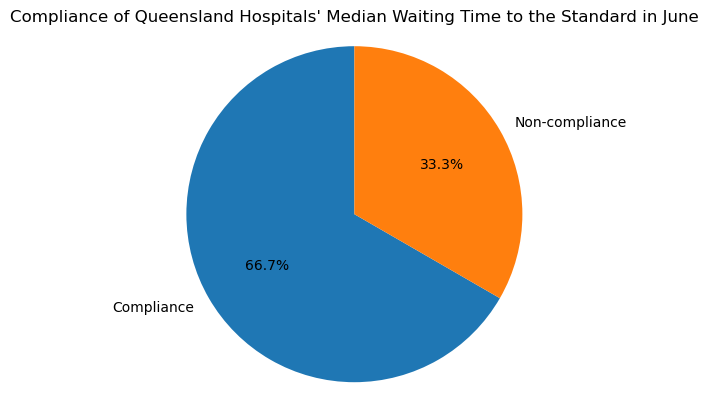

In [29]:
#Using pie chart to visualise the percentage of fail to comply standard across Queensland.
import matplotlib.pyplot as plt

#June data
Total_jun = num_hospitals_jun
Fail_jun = Jun_fail['Name'].count()
Ok_jun = Total_jun - Fail_jun

fig, ax = plt.subplots()
ax.pie([Ok_jun, Fail_jun], labels=['Compliance', 'Non-compliance'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# add title
plt.title("Compliance of Queensland Hospitals' Median Waiting Time to the Standard in June")

# show plot
plt.show()

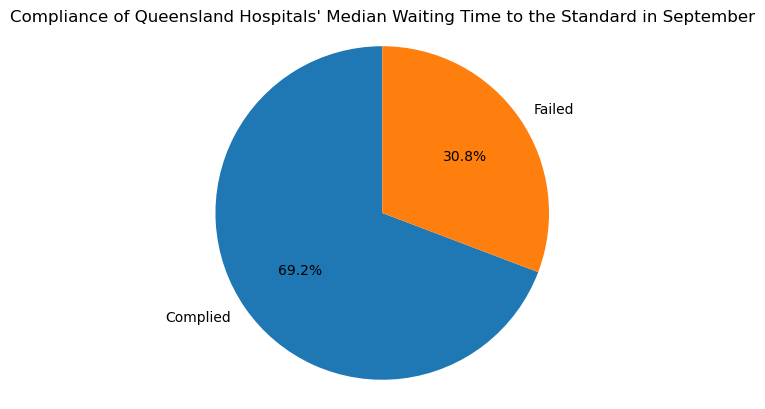

In [30]:
#September data
Total_sep = num_hospitals_sep
Fail_sep = Sep_fail['Name'].count()
Ok_sep = Total_sep - Fail_sep

fig, ax = plt.subplots()
ax.pie([Ok_sep, Fail_sep], labels=['Complied', 'Failed'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# add title
plt.title("Compliance of Queensland Hospitals' Median Waiting Time to the Standard in September")

# show plot
plt.show()

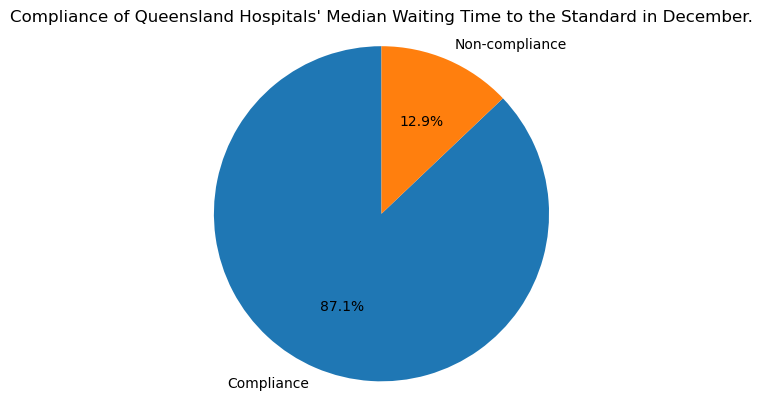

In [31]:
#December data
Total_dec = num_hospitals_dec
Fail_dec = Dec_fail['Name'].count()
Ok_dec = Total_dec - Fail_dec

fig, ax = plt.subplots()
ax.pie([Ok_dec, Fail_dec], labels=['Compliance', 'Non-compliance'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# add title
plt.title("Compliance of Queensland Hospitals' Median Waiting Time to the Standard in December.")

# show plot
plt.show()

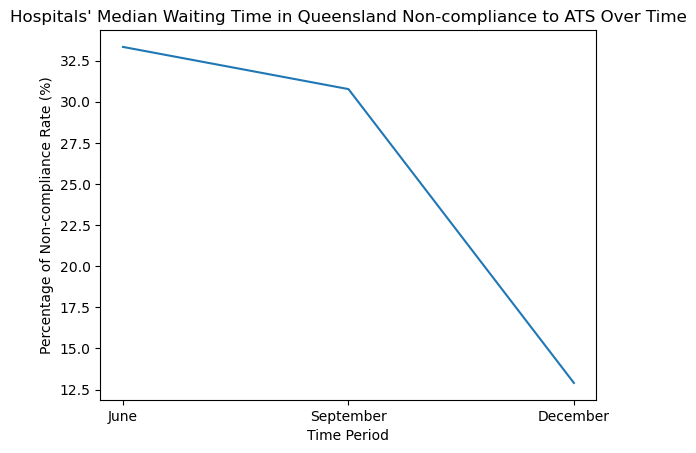

In [32]:
#Visualise the trend of improvement
# Sample data
time_periods = ['June', 'September', 'December']
test_counts = [num_hospitals_jun, num_hospitals_sep, num_hospitals_dec]
pass_counts = [Fail_jun, Fail_sep, Fail_dec] 

# Calculate success rate for each time period
success_rates = [pass_counts[i] / test_counts[i] * 100 for i in range(len(time_periods))]

# Create line chart
plt.plot(time_periods, success_rates)

# Add labels and title
plt.xlabel('Time Period')
plt.ylabel('Percentage of Non-compliance Rate (%)')
plt.title("Hospitals' Median Waiting Time in Queensland Non-compliance to ATS Over Time")

# Show plot
plt.show()

## Conclusion

**Insight**

After analyzing three months' worth of data on hospitals in Queensland, it is clear that the waiting time in the Emergency Department (ED) can be a significant source of stress for parents and caregivers of sick or injured children. While the median waiting time is not a guarantee of prompt treatment, it can indicate a hospital's ability to respond to high triage levels and save lives.

Unfortunately, our analysis shows that 19 hospitals in Queensland did not comply with the Australasian Triage Scale (ATS) in three months of time, and 9 of these hospitals treat less than half of their severely ill or injured patients within the clinically recommended time. This is particularly concerning, as high triage cases require urgent attention, and failure to comply could result in the loss of life. It is also alarming that all 9 of these hospitals had previously failed to comply ATS, with Ipswich and Robina Hospital being the worst performers.

Despite these worrying findings, there is some positive news. The overall trend shows a decrease in non-compliance of ATS over time in Queensland, indicating improvement in the situation. However, for emergency help for children, it is crucial to avoid Ipswich and Robina Hospitals. Further investigation into the reasons for non-compliance is necessary to ensure that hospitals meet the necessary standards for timely care. As a parent of twins who lives in Queensland, I will avoid attending the hospitals found in this analysis to attend if my children has something urgent, but it is glad to know the emergency department from hospitals across Queensland has improved the situation that would put parents and caregivers in stress.